[8.54400374531753, 43, 71, 46, 63]
[19.6468827043885, 49, 142, 68, 137]
[30.0, 58, 211, 88, 211]
[12.36931687685298, 58, 286, 70, 289]
[16.15549442140351, 58, 349, 64, 364]
prediction [1 1 1 1 1]


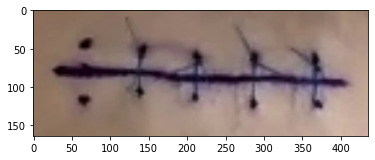

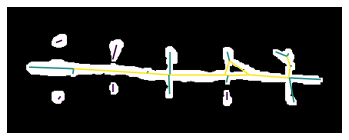

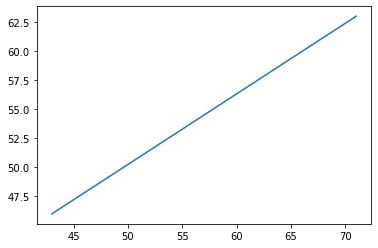

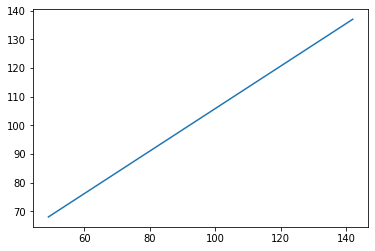

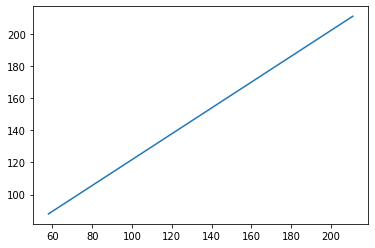

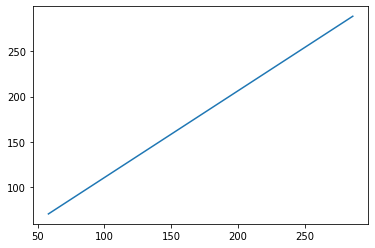

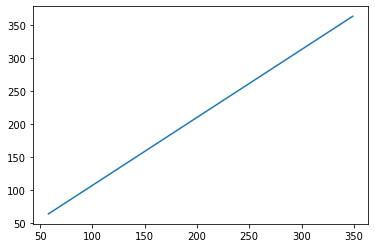

In [11]:
import sys
import matplotlib.pyplot as plt

from skan import draw
from skimage.io import imread

import annotations
import classification
import description
import output
import preprocessing
import segmentation

#if not sys.argv[1].endswith(".json"):
#    print("Output json is not specified")
#    sys.exit()

#outputFile = sys.argv[1]

#if sys.argv[2] == "-v":
#    visualisation = True
#    inputFiles = sys.argv[3:]
#else:
#    visualisation = False
#    inputFiles = sys.argv[2:]

visualisation = True
outputFile = "output.json"
inputFiles = ["../data/anotated_images/images/default/SA_20230222-105936_incision_crop_0.jpg"]

svc = classification.create_svm()
[train_data, train_target] = annotations.read_annotations()
svc.fit(train_data, train_target)

for file in inputFiles:
    img = imread(file)

    if visualisation:
        plt.imshow(img, cmap='gray')

    img = preprocessing.convert_to_grayscale(img)
    img = segmentation.create_segmentation(img)
    segmentation.convert_to_binary(img)

    img = segmentation.remove_separate_points(img)
    branch_data = description.create_branches(img)

    if visualisation:
        #endpoint-to-endpoint (isolated branch)
        #junction-to-endpoint
        #junction-to-junction
        #isolated cycle
        draw.overlay_euclidean_skeleton_2d(img, branch_data, skeleton_color_source='branch-type')

    features = description.get_feature_vector(branch_data)

    for val in features:
        print(val)
        plt.figure()
        plt.plot([val[1], val[2]], [val[3], val[4]])

    branch_types = classification.classify(svc, features)

    print(f"prediction {branch_types}")

    # Vytvoř seznam s body, které patří částem skeletu, které klasifikace ohodnotila -1
    incisions = list()

    # output.write_to_output(outputFile, file, incisions, , )